In [1]:
%matplotlib inline
import pandas as pd

In [2]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [42]:
cast = pd.DataFrame.from_csv('data/cast.csv', index_col=None)
cast.head()

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN


In [43]:
release_dates = pd.DataFrame.from_csv('data/release_dates.csv', index_col=None,
                                      parse_dates=['date'], infer_datetime_format=True)
release_dates.head()

,title,year,country,date
0,"#73, Shaanthi Nivaasa",2007,India,2007-06-15
1,#Beings,2015,Romania,2015-01-29
2,#Declimax,2018,Netherlands,2018-01-21
3,#Ewankosau saranghaeyo,2015,Philippines,2015-01-21
4,#Horror,2015,USA,2015-11-20


### Make a bar plot of the months in which movies with "Christmas" in their title tend to be released in the USA.

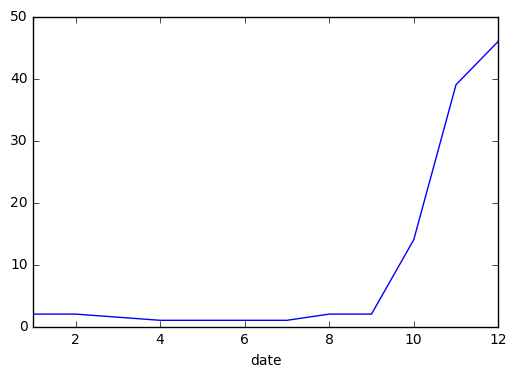

In [30]:
r = release_dates
r = r[(r.title.str.contains('Christmas'))]
r = r[r.country == 'USA']
r.groupby(r.date.dt.month).size().plot()

### Make a bar plot of the months in which movies whose titles start with "The Hobbit" are released in the USA.

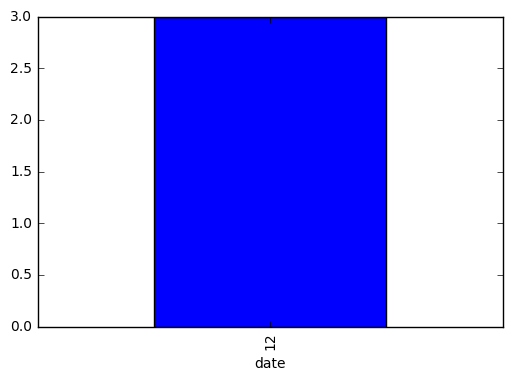

In [34]:
r = release_dates
r = r[(r.title.str.startswith('The Hobbit'))]
r = r[r.country == 'USA']
r.groupby(r.date.dt.month).size().plot(kind = "bar")

### Make a bar plot of the day of the week on which movies with "Romance" in their title tend to be released in the USA.

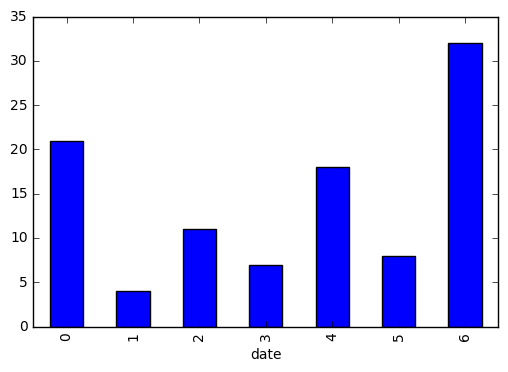

In [36]:
r = release_dates
r = r[(r.title.str.contains('Romance'))]
r = r[r.country == 'USA']
r.groupby(r.date.dt.dayofweek).size().plot(kind = "bar")

### Make a bar plot of the day of the week on which movies with "Action" in their title tend to be released in the USA.

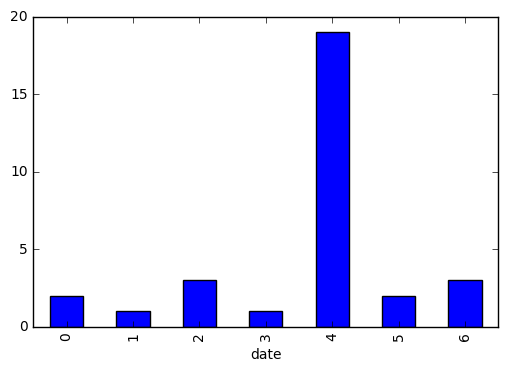

In [37]:
r = release_dates
r = r[(r.title.str.contains('Action'))]
r = r[r.country == 'USA']
r.groupby(r.date.dt.dayofweek).size().plot(kind = "bar")

### On which date was each Judi Dench movie from the 1990s released in the USA?

In [84]:
c = cast
c = c[(c.name == 'Judi Dench') & (c.year // 10 * 10 == 1990)]
c = c.merge(release_dates)
c = c[c.country == 'USA']
#c = c.date.dt.day
c.date

1     1995-11-17
40    1996-12-25
71    1996-03-22
78    1997-10-03
101   1999-01-08
147   1999-05-14
173   1999-11-19
246   1997-12-19
Name: date, dtype: datetime64[ns]

### In which months do films with Judi Dench tend to be released in the USA?

In [81]:
c = cast
c = c[(c.name == 'Judi Dench')]
c = c.merge(release_dates)
c = c[c.country == 'USA']
c = c.groupby(c.date.dt.month).size()

date
1      4
2      4
3      3
4      2
5      4
6      3
7      1
8      1
9      2
10     1
11    12
12     4
dtype: int64

### In which months do films with Tom Cruise tend to be released in the USA?

In [87]:
c = cast
c = c[(c.name == 'Tom Cruise')]
c = c.merge(release_dates)
c = c[c.country == 'USA']
c = c.groupby(c.date.dt.month).size()
c

date
1      2
3      1
4      3
5      5
6      8
7      7
8      3
9      1
10     3
11     3
12    10
dtype: int64

# EXAMPLES BY BRANDON RHODEA

In [6]:
r = release_dates
r.head()

,title,year,country,date
0,"#73, Shaanthi Nivaasa",2007,India,2007-06-15
1,#Beings,2015,Romania,2015-01-29
2,#Declimax,2018,Netherlands,2018-01-21
3,#Ewankosau saranghaeyo,2015,Philippines,2015-01-21
4,#Horror,2015,USA,2015-11-20


In [90]:
r.date.dt.year.head()
r.date.dt.dayofweek.head()
r.date.dt.dayofyear.head()

3485    325
6564    152
7133    330
8442     33
9903    221
Name: date, dtype: int64

# Merge Function

In [93]:
c = cast
c = c[c.name == 'Ellen Page']
c.merge(release_dates).head()

,title,year,name,type,character,n,country,date
0,An American Crime,2007,Ellen Page,actress,Sylvia Likens,1.0,Sweden,2007-12-07
1,An American Crime,2007,Ellen Page,actress,Sylvia Likens,1.0,Greece,2008-05-15
2,An American Crime,2007,Ellen Page,actress,Sylvia Likens,1.0,Spain,2008-06-13
3,An American Crime,2007,Ellen Page,actress,Sylvia Likens,1.0,Finland,2008-07-18
4,An American Crime,2007,Ellen Page,actress,Sylvia Likens,1.0,Mexico,2008-08-08


# Pivot

In [15]:
r = release_dates
r = r[r.title.str.startswith('Star Wars: Episode')]
r = r[r.country.str.startswith('U')]
r.pivot('title', 'country', 'date')

country,UK,USA,Ukraine,United Arab Emirates,Uruguay
title,,,,,
Star Wars: Episode I - The Phantom Menace,1999-07-15,1999-05-19,NaT,1999-08-25,1999-07-02
Star Wars: Episode II - Attack of the Clones,2002-05-16,2002-05-16,2002-06-08,2002-05-16,2002-07-05
Star Wars: Episode III - Revenge of the Sith,2005-05-19,2005-05-19,NaT,2005-05-19,2005-05-18
Star Wars: Episode IX,NaT,2019-05-24,NaT,NaT,NaT
Star Wars: Episode V - The Empire Strikes Back,1980-05-21,1980-06-20,NaT,NaT,1981-01-15
Star Wars: Episode VI - Return of the Jedi,1983-06-02,1983-05-25,NaT,NaT,1984-01-01
Star Wars: Episode VII - The Force Awakens,2015-12-17,2015-12-18,2015-12-17,2015-12-17,2015-12-17
Star Wars: Episode VIII,2017-12-15,2017-12-15,NaT,NaT,NaT


In [18]:
c = cast
c = c[c.n <= 2]
c = c[c.name == 'Cary Grant']
c.head()

,title,year,name,type,character,n
847622,An Affair to Remember,1957,Cary Grant,actor,Nickie Ferrante,1.0
847623,Arsenic and Old Lace,1944,Cary Grant,actor,Mortimer Brewster,1.0
847624,Big Brown Eyes,1936,Cary Grant,actor,Danny Barr,1.0
847626,Born to Be Bad,1934,Cary Grant,actor,Malcolm Trevor,2.0
847627,Bringing Up Baby,1938,Cary Grant,actor,David,2.0


In [ ]:
c = cast
c = c.merge(cast, on = ['title', 'year'])
c = c[c.n_y <= 2]
c = c[c.name_y != 'Cary Grant']
c.head()